In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix

In [4]:
# Load the dataset
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

# Display the first few rows to understand the structure
print(df.head(5))

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

Data Cleaning

Check for missing values:

In [5]:
# Check for missing values
print(df.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


Check for duplicates:

In [6]:
print(df.duplicated().sum())

723


Removing duplicates

In [8]:
df.drop_duplicates(inplace=True)

Exploratory Data Analysis (EDA)

In [9]:
#Summary statistics of numerical columns
print(df.describe())

             age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  302.00000              302.000000   302.000000      302.000000   
mean    54.42053              131.602649   246.500000      149.569536   
std      9.04797               17.563394    51.753489       22.903527   
min     29.00000               94.000000   126.000000       71.000000   
25%     48.00000              120.000000   211.000000      133.250000   
50%     55.50000              130.000000   240.500000      152.500000   
75%     61.00000              140.000000   274.750000      166.000000   
max     77.00000              200.000000   564.000000      202.000000   

          oldpeak      target  
count  302.000000  302.000000  
mean     1.043046    0.543046  
std      1.161452    0.498970  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.800000    1.000000  
75%      1.600000    1.000000  
max      6.200000    1.000000  


Data Distribution:

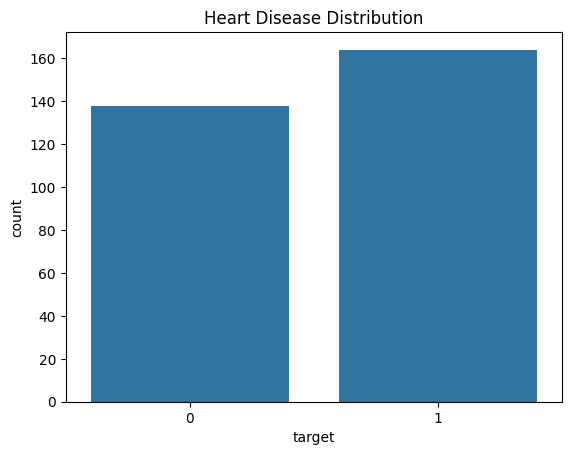

In [10]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

Visualizing Feature Relationships

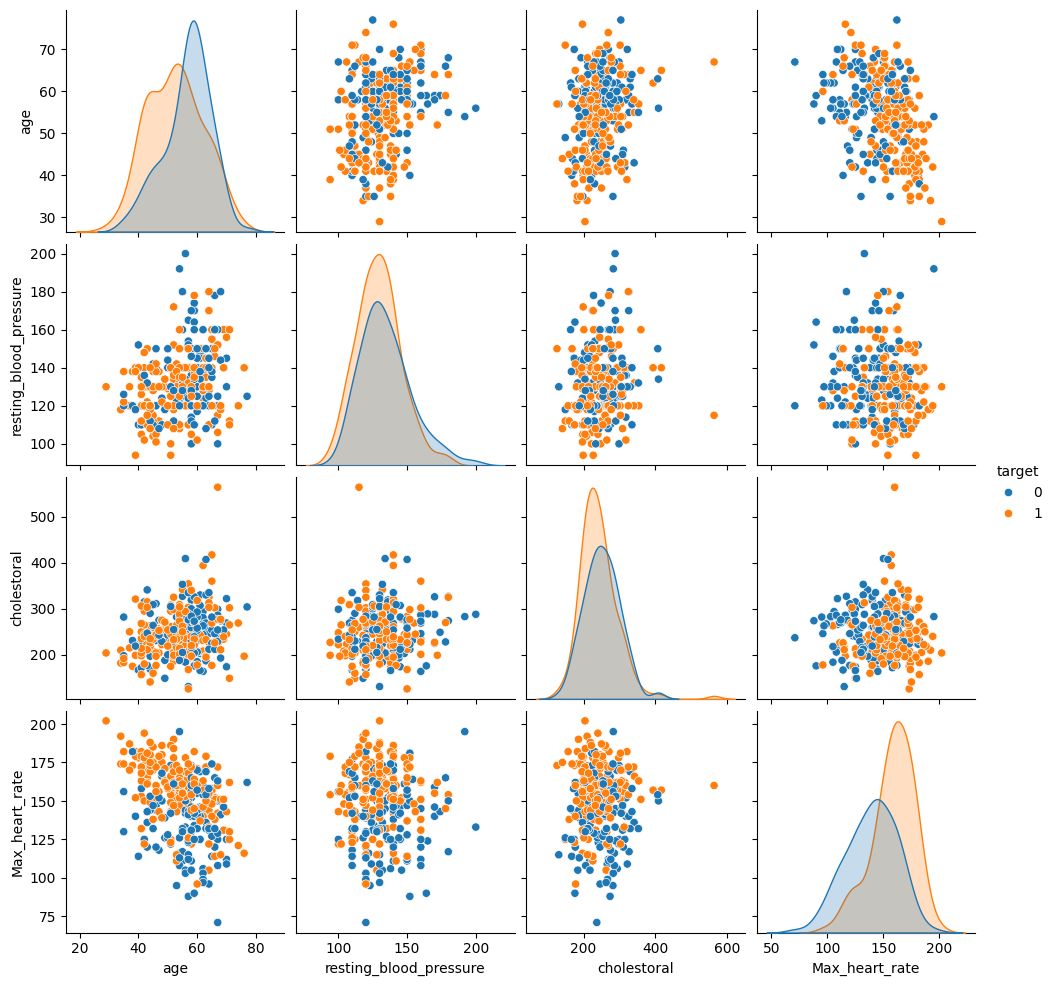

In [13]:
# Visualizing relationships between features and the target
sns.pairplot(df, hue='target', vars=['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate'])
plt.show()


Correlation Matrix

In [17]:
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

In [ ]:
# Initializing LabelEncoder
le = LabelEncoder()

In [ ]:
# Applying label encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

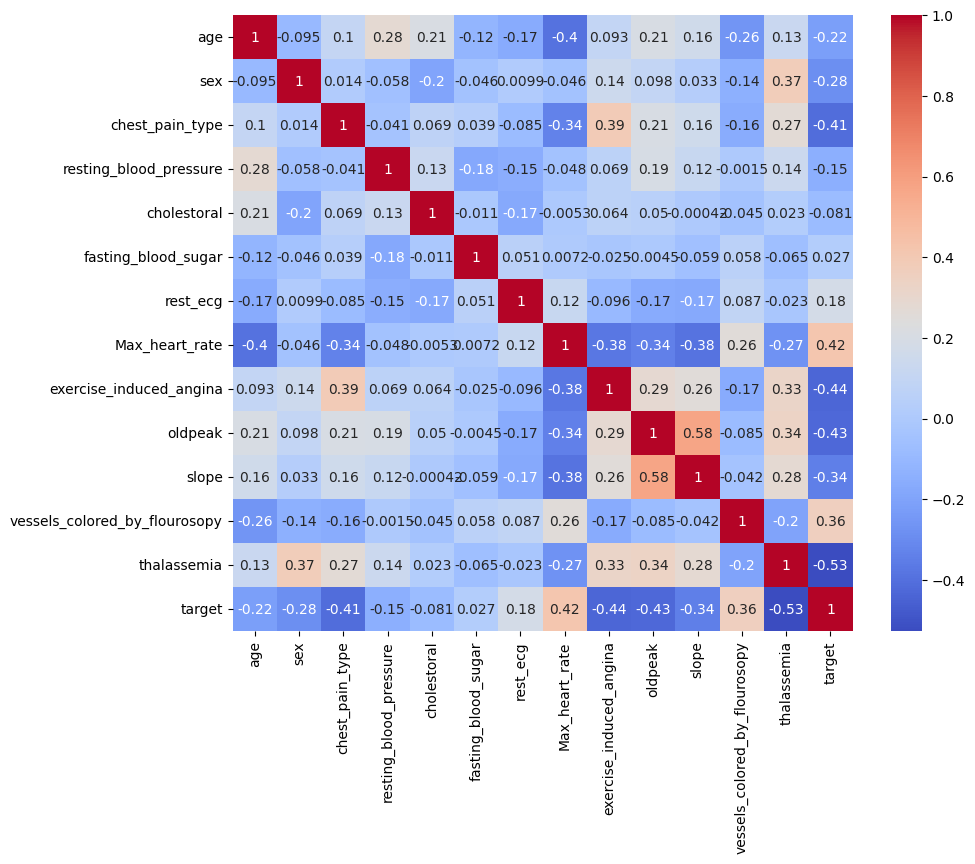

In [20]:
# Ploting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing

Split Data into Features and Target

In [ ]:
# Separating features and target variable
X = df.drop('target', axis=1)
y = df['target']

Split the Data into Training and Testing Sets

In [22]:
# Spliting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [23]:
# Standardizing the feature data (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Classification Models

In [24]:
# Initializing the Logistic Regression model
log_reg = LogisticRegression()

In [25]:
# Training the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
# Making predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

Decision Tree Model

In [27]:
# Initializing the Decision Tree model
decision_tree = DecisionTreeClassifier()

In [28]:
# Training the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Making predictions
y_pred_tree = decision_tree.predict(X_test)

Evaluating the Model

Accuracy Score

In [30]:
# Evaluate using accuracy
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}')

Logistic Regression Accuracy: 0.8032786885245902
Decision Tree Accuracy: 0.7377049180327869


Confusion Matrix

In [31]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f'Confusion Matrix (Logistic Regression):\n{conf_matrix_log_reg}')

# Confusion Matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(f'Confusion Matrix (Decision Tree):\n{conf_matrix_tree}')

Confusion Matrix (Logistic Regression):
[[25  7]
 [ 5 24]]
Confusion Matrix (Decision Tree):
[[20 12]
 [ 4 25]]


ROC Curve and AUC 

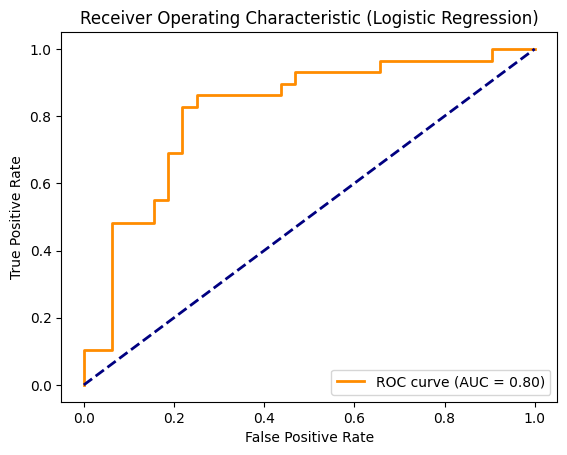

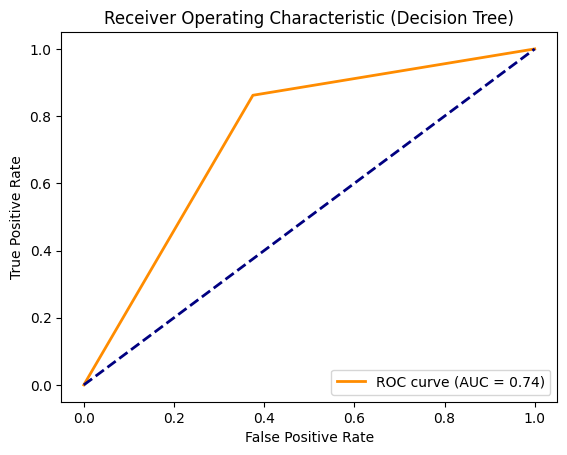

In [32]:
# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

Feature Importance Analysis for Decision Trees

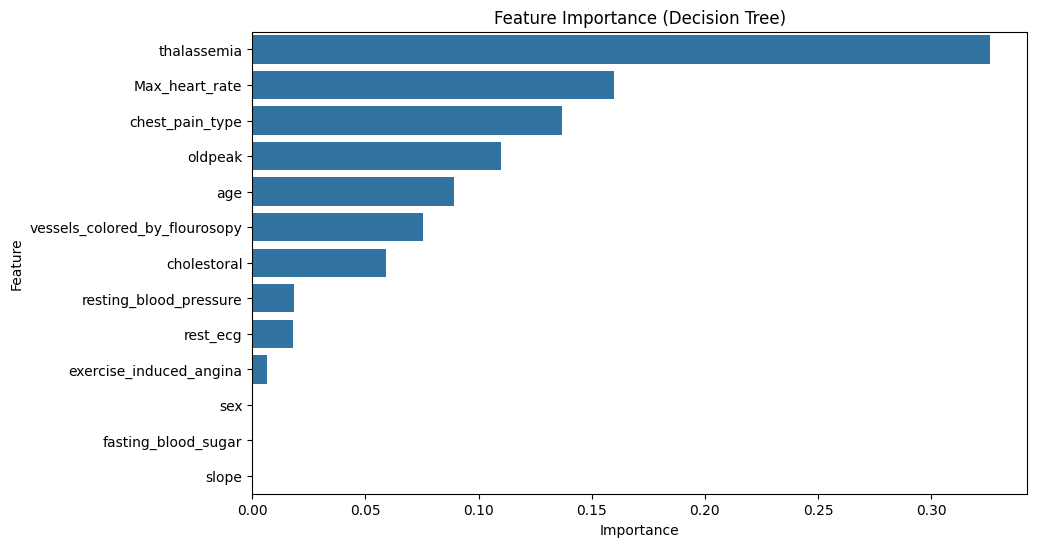

In [33]:
# Plot feature importance for Decision Tree
feature_importance = decision_tree.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Decision Tree)')
plt.show()
